# Taller 5 - Morfología matemática

# Punto 5 - Imagen de distancia

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

### 5.0 Inicialización

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle
from scipy.ndimage import morphological_gradient
from skimage.filters import sobel_h, sobel_v, sobel
from skimage import exposure
from scipy.ndimage import distance_transform_edt



### 5.1 Cargado y visualización de la imagen

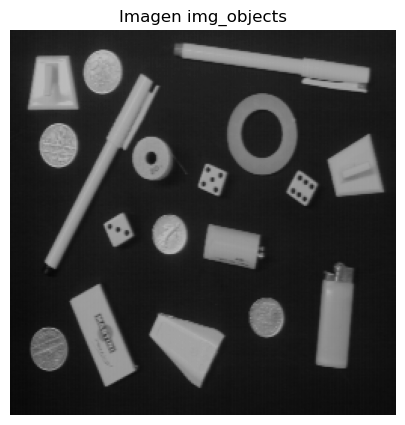

In [9]:
ruta_objects = './images/objects.png'
img_objects = cv2.imread(ruta_objects, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_objects, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen img_objects')
ax.axis('off')
plt.show()

### 5.2 Umbralizado de la imagen para ceparar los objetos del fondo.



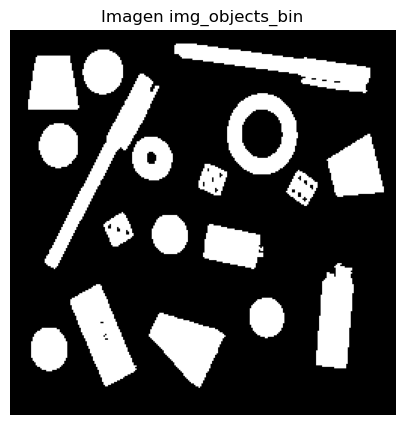

In [10]:
img_objects_bin = cv2.threshold(img_objects, 70, 255, cv2.THRESH_BINARY)[1]

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_objects_bin, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen img_objects_bin')
ax.axis('off')
plt.show()

### 5.3 Cálculo de la imagen a distancia realizando una expanción de contraste.

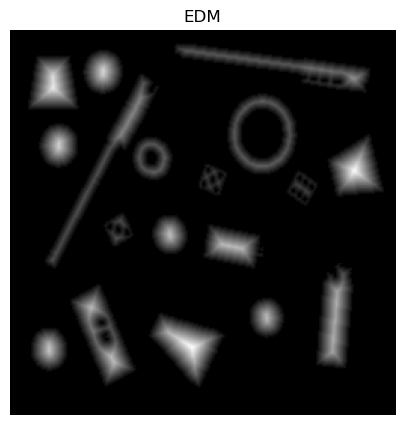

In [ ]:
edm = distance_transform_edt(img_objects_bin)
edm = exposure.rescale_intensity(edm, in_range=(np.min(edm), np.max(edm)), out_range=(0, 255)).astype(np.uint8)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(edm, cmap='gray', vmin=0, vmax=255)
ax.set_title('EDM')
ax.axis('off')
plt.show()



### 5.4 Negativo de la imagen umbralizada del punto 3

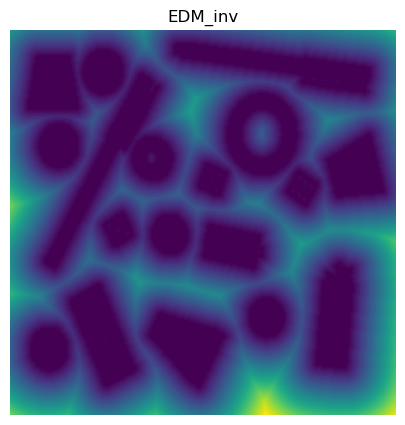

In [38]:
img_objects_bin_inv = cv2.bitwise_not(img_objects_bin)

edm_inv = distance_transform_edt(img_objects_bin_inv)
edm_inv = exposure.rescale_intensity(edm_inv, in_range=(np.min(edm_inv), np.max(edm_inv)), out_range=(0, 255)).astype(np.uint8)
edm_inv_mask = cv2.threshold(edm_inv, 65, 255, cv2.THRESH_BINARY)[1]
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(edm_inv)
ax.set_title('EDM_inv')
ax.axis('off')
plt.show()